In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

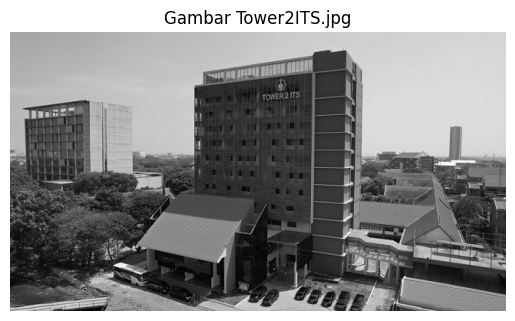

In [2]:
# Memuat gambar Tower2ITS.jpg
img = cv2.imread('Tower2ITS.jpg', cv2.IMREAD_GRAYSCALE)
plt.title('Gambar Tower2ITS.jpg')
plt.imshow(img, cmap='gray'), plt.axis('off')
plt.show()

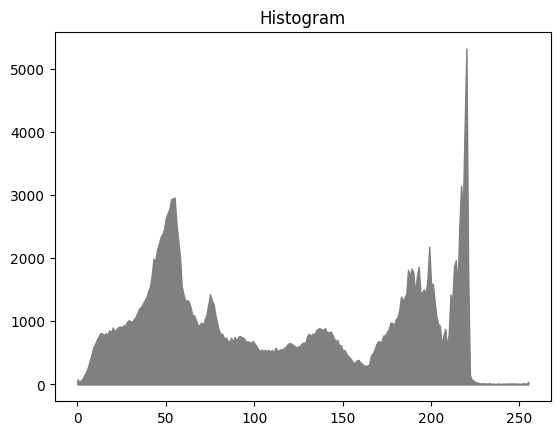

In [3]:
# 1. a

# Membuat histogram
imgHist = cv2.calcHist([img], [0], None, [256], [0,256])
plt.title('Histogram')
plt.fill_between(np.arange(imgHist.shape[0]), imgHist.reshape(-1), color='gray')
plt.show()

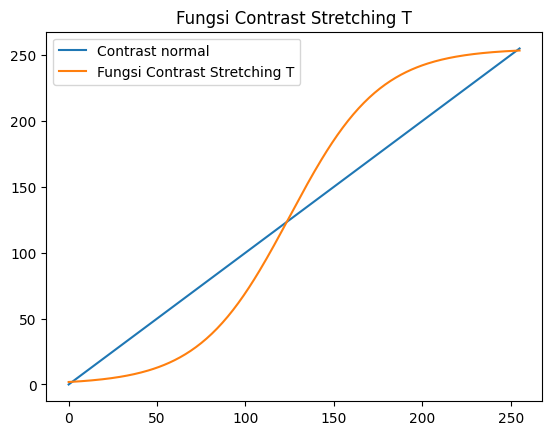

In [4]:
# 1. b

# Membuat fungsi contrast stretching T
def stretchContrast(x):
    return 255/(1+np.exp(-10*(x-125)/255))

plt.title('Fungsi Contrast Stretching T')
plt.plot(np.arange(0, 256), label='Contrast normal')
plt.plot(stretchContrast(np.arange(0, 256)), label='Fungsi Contrast Stretching T')
plt.legend()
plt.show()

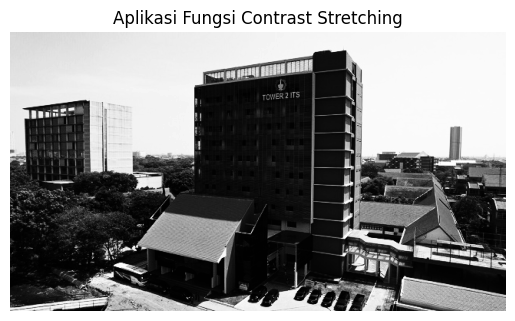

In [5]:
# 1. c

# Contrast Stretch pada Citra
imgContrast = stretchContrast(img.astype(np.float32))
imgContrast = imgContrast.astype(np.uint8)
plt.title('Aplikasi Fungsi Contrast Stretching')
plt.imshow(imgContrast, cmap='gray'), plt.axis('off')
plt.show()

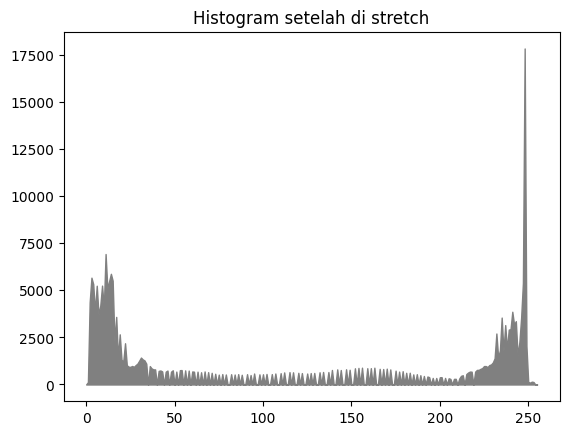

In [6]:
# 1. d

# Histogram dari gambar yang telah di stretch
imgContrastHist = cv2.calcHist([imgContrast], [0], None, [256], [0,256])
plt.title('Histogram setelah di stretch')
plt.fill_between(np.arange(imgContrastHist.shape[0]), imgContrastHist.reshape(-1), color='gray')
plt.show()

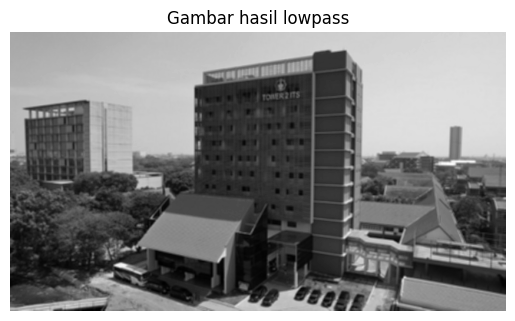

In [7]:
# 2. a

# Lowpass filter
lowpassKernel = np.array([[1, 1, 1],
                          [1, 1, 1],
                          [1, 1, 1]])/9
imgLowpass = cv2.filter2D(img,-1,lowpassKernel)
plt.title('Gambar hasil lowpass')
plt.imshow(imgLowpass, cmap='gray'), plt.axis('off')
plt.show()

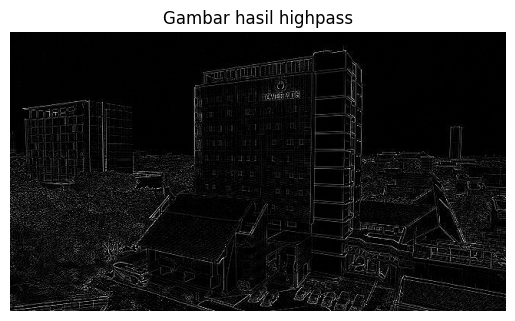

In [8]:
# 2. b

# Highpass filter
highpassKernel = np.array([[0, 1, 0],
                           [1,-4, 1],
                           [0, 1, 0]])
imgHighpass = cv2.filter2D(img,-1,highpassKernel)
plt.title('Gambar hasil highpass')
plt.imshow(imgHighpass, cmap='gray'), plt.axis('off')
plt.show()

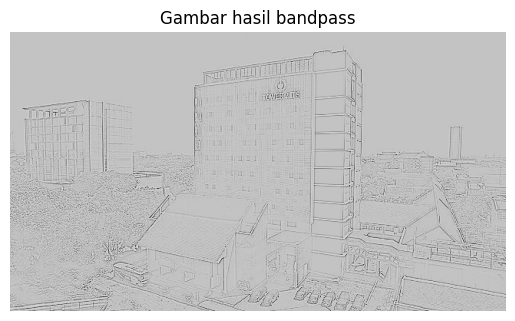

In [9]:
# 2. c

# Bandpass filter

# Bandreject = low + high
imgBandreject = imgLowpass.astype(np.float32) + imgHighpass.astype(np.float32)

# Bandpass = img - Bandreject
imgBandpass = img - imgBandreject
plt.title('Gambar hasil bandpass')
plt.imshow(imgBandpass, cmap='gray'), plt.axis('off')
plt.show()

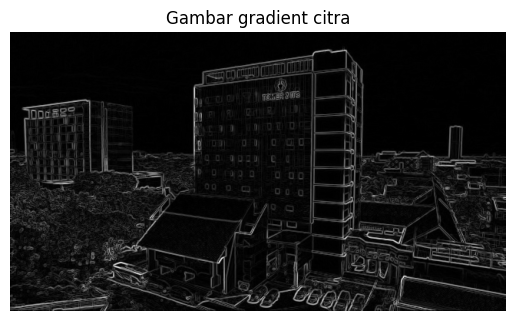

In [10]:
# 3. c

# Gradient Citra
kernelRobertsX = np.array([[-1,-2,-1],
                           [ 0, 0, 0],
                           [ 1, 2, 1]])
kernelRobertsY = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

imgGradX = cv2.filter2D(img.astype(np.float32),-1,kernelRobertsX)
imgGradY = cv2.filter2D(img.astype(np.float32),-1,kernelRobertsY)
imgGradient = np.sqrt(imgGradX**2 + imgGradY**2)

plt.title('Gambar gradient citra')
plt.imshow(imgGradient, cmap='gray'), plt.axis('off')
plt.show()